In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS



In [48]:
df = pd.read_csv("dataset_final_2.csv")

In [49]:
len(df)

5647

<Axes: xlabel='sentiment'>

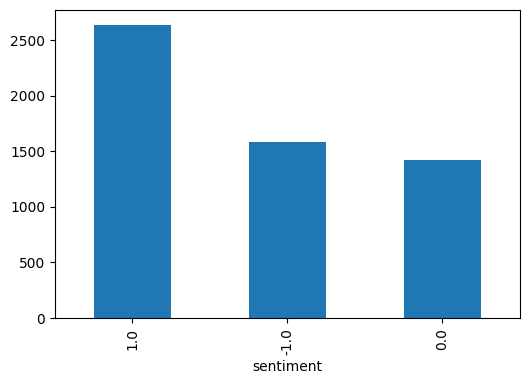

In [50]:
df['sentiment'].value_counts().plot.bar(figsize = (6, 4))

In [51]:
df.dropna(subset = ["feedback"], inplace=True) # drop those rows which have NaN value cells
df = df.reset_index(drop = True)


In [52]:
len(df)

5645

In [53]:
df.head()

,stu_id,year,dept,feedback,sentiment
0,19104001,BE,IT,The lectures were engaging,1.0
1,19104002,BE,IT,The course material was poorly organized,-1.0
2,19104003,BE,IT,The professor was knowledgeable and approachable,1.0
3,19104004,BE,IT,The workload was manageable,0.0
4,19104005,BE,IT,The facilities were outdated and cramped,-1.0


In [54]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # add additional stop words to remove

In [55]:
# Remove stopwords and remove words with 2 or less characters using gensim
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [56]:
df['clean'] = df['feedback'].apply(preprocess)

In [57]:
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [58]:
df.head()

,stu_id,year,dept,feedback,sentiment,clean,clean_joined
0,19104001,BE,IT,The lectures were engaging,1.0,"[lectures, engaging]",lectures engaging
1,19104002,BE,IT,The course material was poorly organized,-1.0,"[course, material, poorly, organized]",course material poorly organized
2,19104003,BE,IT,The professor was knowledgeable and approachable,1.0,"[professor, knowledgeable, approachable]",professor knowledgeable approachable
3,19104004,BE,IT,The workload was manageable,0.0,"[workload, manageable]",workload manageable
4,19104005,BE,IT,The facilities were outdated and cramped,-1.0,"[facilities, outdated, cramped]",facilities outdated cramped


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.feedback, df.sentiment, test_size = 0.2)

In [60]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)
import pickle
with open('tfidf.pickle', 'wb') as f:
    pickle.dump(tfvect, f)

In [62]:
print(y_train)

0      -1.0
1      -1.0
2       1.0
3       1.0
4       1.0
       ... 
4511    1.0
4512    1.0
4513   -1.0
4514    0.0
4515    1.0
Name: sentiment, Length: 4516, dtype: float64


In [63]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

pac_classifier = PassiveAggressiveClassifier()
pac_classifier.fit(tfid_x_train,y_train)
y_pred = pac_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
pac_score = round(score*100,2)
print(f'Accuracy: {pac_score}%')

Accuracy: 82.55%


In [64]:
from sklearn.naive_bayes import MultinomialNB 
nb_classifier = MultinomialNB()
nb_classifier.fit(tfid_x_train,y_train)
y_pred = nb_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
nb_score = round(score*100,2)
print(f'Accuracy: {nb_score}%')

Accuracy: 80.07%


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knc_classifier=KNeighborsClassifier()
knc_classifier.fit(tfid_x_train,y_train)
y_pred = knc_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
knc_score = round(score*100,2)
print(f'Accuracy: {knc_score}%')

Accuracy: 77.95%


In [66]:
from sklearn.linear_model import LogisticRegression
lr_classifier=LogisticRegression()
lr_classifier.fit(tfid_x_train,y_train)
y_pred = lr_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
lr_score = round(score*100,2)
print(f'Accuracy: {lr_score}%')

Accuracy: 83.35%


In [67]:
from sklearn.tree import DecisionTreeClassifier
dtc_classifier=DecisionTreeClassifier()
dtc_classifier.fit(tfid_x_train,y_train)
y_pred = dtc_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
dtc_score = round(score*100,2)
print(f'Accuracy: {dtc_score}%')

Accuracy: 77.59%


In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier=RandomForestClassifier()
rfc_classifier.fit(tfid_x_train,y_train)
y_pred = rfc_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
rfc_score = round(score*100,2)
print(f'Accuracy: {rfc_score}%')

Accuracy: 84.15%


In [69]:
import pickle
with open('RFC.pickle', 'wb') as f:
    pickle.dump(rfc_classifier, f)